<a href="https://colab.research.google.com/github/taufik015/AMS/blob/main/habibtweet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load libraries

In [3]:
import pandas as pd
import time
import tweepy
import numpy as np

In [4]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("XGGIQ7T9WRg3JpBJOrX7NfkbE",
    "iQSaKgVIekk7kq9P7f96fkPqcN5tO8xGBfpFQac9pd6aav2nho")
    auth.set_access_token("1575101006647795714-8U17W8fWcPeKn1idEC5YcsnS03IvjL",
    "k00NRCbQnI8SOMDUre1Axi4cFq48N1oPQtaW09Gc9naGR")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [5]:
# buat extractor object
extractor = twitter_config()

Authentication OK


# ambil tweets dari username

In [28]:

tweets = extractor.user_timeline(screen_name="Husen_Jafar", count=1000)
print("Tweets terambil: {}.\n".format(len(tweets)))


print("5 tweet teratas:\n")
for tweet in tweets[:100]:
    print(tweet.text)
    print()

Tweets terambil: 200.

5 tweet teratas:

RT @WarungSejarahRI: Ateisme dewasa ini; potret kegagalan Manusia modern

Oleh: Ignace Lepp

Tahun 1985
190 Halaman

Harga 55.000
Minat?…

Iya nggak? https://t.co/QvT8ccmxen

Selamat datang, Senin. Silakan. || 📸 @tiyanglestrek https://t.co/ZHaHWugHP0

Eh, yg 2 tahun lalu katanya sedih krn gak bisa maulidan bareng krn pandemi. Sekarang, pas udah bisa, maulidan nggak?

@jek___ ((BIP)) Badan Ideologi Pancasila?

@tiyanglestrek Siap.

Minggu sore, ngopi di sungai yg airnya hitam di Palangkaraya. https://t.co/AaPIMc1gyX

@tiyanglestrek Dua ini. Yg digambar yg saya aja ya. https://t.co/yhJKtOnq9o

@tiyanglestrek Yaudah, saya order.

Minggu ngapain?

Animasi Terbaru &gt;&gt; https://t.co/1C6QXexXWx. https://t.co/5TmGqX4cYH

Saya Live Sekarang dari Palangkaraya &gt;&gt; https://t.co/yJssaaRYjr.

Hari ini Maulid Nabi. Pokok apapun yg terjadi, gimana perasaan kita harus tetap dijaga agar tak ada suatu kesedihan… https://t.co/DJiL632xiE

Sudah ngopi? https

# memasukkan ke dataframe pandas

In [29]:
# Kita dapat membuat kerangka data sebagai berikut:
dataset = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Kami membuat tampilan kerangka data:
display(dataset.head(100))

,Tweets
0,RT @WarungSejarahRI: Ateisme dewasa ini; potre...
1,Iya nggak? https://t.co/QvT8ccmxen
2,"Selamat datang, Senin. Silakan. || 📸 @tiyangle..."
3,"Eh, yg 2 tahun lalu katanya sedih krn gak bisa..."
4,@jek___ ((BIP)) Badan Ideologi Pancasila?
...,...
95,"Beli. Baca. Biar pikiran, perkataan, dan sikap..."
96,RT @WarungSejarahRI: Paket borongan Buku Karya...
97,Terakhir ngobrol panjang dgn alm. Pak Azyumard...
98,🤣 Bahas: Kok bisa ya Salafi lucu? https://t.co...


# cek internal tweets

Sesuatu yang menarik adalah jumlah metode internal yang dimiliki struktur tweet di Tweepy:

In [30]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


Dari sini menarik bahwa, jika kita ingin mendapatkan data seperti tanggal pembuatan tweet atau perangkat yang membuatnya, kita dapat mengakses informasi ini dengan metode yang muncul di daftar ini. Contohnya adalah sebagai berikut:

In [31]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1579380961988710400
2022-10-10 07:58:59
Twitter for iPhone
0
2
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WarungSejarahRI', 'name': 'IG: WarungSejarahRI', 'id': 2362274258, 'id_str': '2362274258', 'indices': [3, 19]}], 'urls': []}


# tambahkan informasi relevan

Kami menambahkan informasi yang relevan

In [32]:
dataset['len'] = np.array([len(tweet.text) for tweet in tweets])
dataset['ID']  = np.array([tweet.id for tweet in tweets])
dataset['Created'] = np.array([tweet.created_at for tweet in tweets])
dataset['Source'] = np.array([tweet.source for tweet in tweets])
dataset['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
dataset['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [33]:
dataset.head()

,Tweets,len,ID,Created,Source,Likes,RTs
0,RT @WarungSejarahRI: Ateisme dewasa ini; potre...,137,1579380961988710400,2022-10-10 07:58:59,Twitter for iPhone,0,2
1,Iya nggak? https://t.co/QvT8ccmxen,34,1579380792786325504,2022-10-10 07:58:19,Twitter for iPhone,1914,174
2,"Selamat datang, Senin. Silakan. || 📸 @tiyangle...",75,1579305790804201472,2022-10-10 03:00:17,Twitter for iPhone,594,11
3,"Eh, yg 2 tahun lalu katanya sedih krn gak bisa...",116,1579065562310721537,2022-10-09 11:05:42,Twitter for iPhone,2066,121
4,@jek___ ((BIP)) Badan Ideologi Pancasila?,41,1579053358366629888,2022-10-09 10:17:12,Twitter for iPhone,71,0


# Visualisasi dan statistik dasar
## Rata-rata dan popularitas
Pertama, kami tertarik untuk mengetahui statistik dasar tentang informasi yang kami ekstrak, seperti rata-rata panjang setiap tweet, yang merupakan tweet dengan paling favorit, mana yang paling banyak di-retweet tweet, dll.

In [34]:
# extract rata-rata:
media = np.mean(dataset['len'])

print("Jumlah rata-rata karakter di tweet: {}".format(media))

Jumlah rata-rata karakter di tweet: 86.32


In [35]:
# Kami mengekstrak tweet dengan FAV paling banyak dan dengan RT terbanyak:

fav_max = np.max(dataset['Likes'])
rt_max  = np.max(dataset['RTs'])

fav = dataset[dataset.Likes == fav_max].index[0]
rt  = dataset[dataset.RTs == rt_max].index[0]

# Max FAVs:
print("Tweet yang paling banyak disukai adalah: \n{}".format(dataset['Tweets'][fav]))
print("Jumlah suka: {}".format(fav_max))
print("{} Characters.\n".format(dataset['len'][fav]))


Tweet yang paling banyak disukai adalah: 
Seorang Ibu, jelang subuh, menengok kasur anaknya masih kosong. Perasaannya tak enak. Namun ia berpikir, anaknya ke… https://t.co/rGf9cNZm2c
Jumlah suka: 49890
140 Characters.



In [36]:
# Max RTs:
print("Tweet dengan retweet terbanyak adalah: \n{}".format(dataset['Tweets'][rt]))
print("Jumlah retweet: {}".format(rt_max))
print("{} Characters.\n".format(dataset['len'][rt]))

Tweet dengan retweet terbanyak adalah: 
RT @Husen_Jafar: Sebisa mungkin tahajud. Kalau belum bisa, upayakan tetap bangun lalu baca zikir &amp; salawat. Kalau masih gagal, niatkan aja…
Jumlah retweet: 11134
143 Characters.



# Deret waktu

Karena kita memiliki seluruh vektor tanggal pembuatan, kita dapat membuat deret waktu sehubungan dengan panjang tweet, favorit, dan retweet.

In [37]:
tlen = pd.Series(data=dataset['len'].values, index=dataset['Created'])
tfav = pd.Series(data=dataset['Likes'].values, index=dataset['Created'])
tret = pd.Series(data=dataset['RTs'].values, index=dataset['Created'])

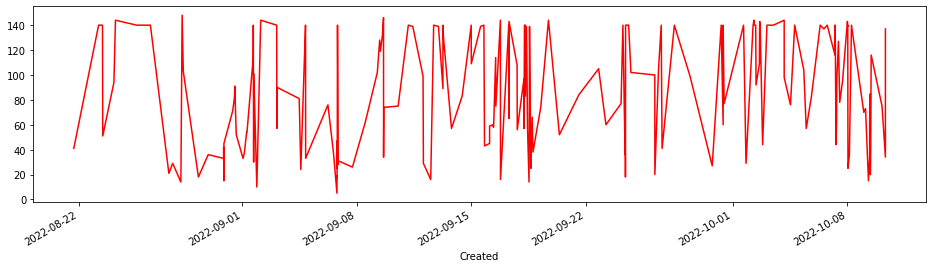

In [38]:
tlen.plot(figsize=(16,4), color='r');

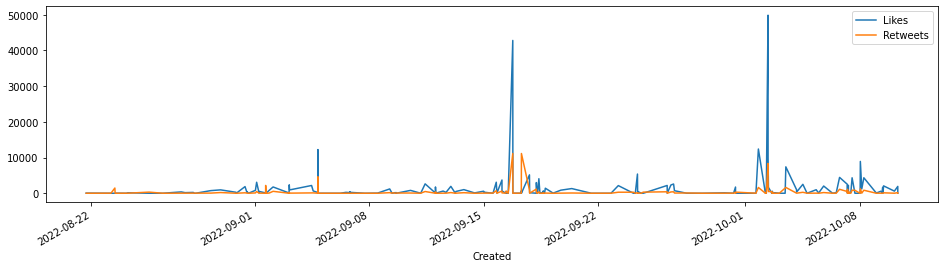

In [39]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# Bagan pai perangkat
Kami membersihkan sumber pembuatan tweet untuk membuat diagram lingkaran:

In [40]:
sources = []
for source in dataset['Source']:
    if source not in sources:
        sources.append(source)

# pembuatan:
print("Sumber pembuatan konten:")
for source in sources:
    print("* {}".format(source))

Sumber pembuatan konten:
* Twitter for iPhone


## Kami menghitung perangkat dan membuat diagram lingkaran:

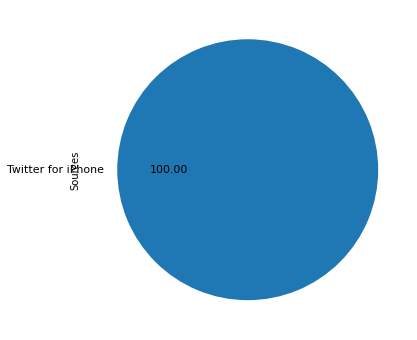

In [25]:
percent = np.zeros(len(sources))

for source in dataset['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

# simpan csv

In [27]:
dataset.to_csv('dataset_user.csv',sep=';')